# Assignment 2
## Mengting Yang

In [52]:
#import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from datetime import datetime
from collections import Counter
import random
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
from __future__ import print_function
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
import pylab as pl

warnings.filterwarnings('ignore')

%matplotlib inline

In [53]:
#load data set
orcl = pd.read_csv("orcl.csv", sep=',')
orcl.head()

,Date,Time,Open,High,Low,Close,Volume,Adj Close,ORCL Return,Gain,SP Adj Close,SP Return
0,1/3/00,Before Finance Recession,31.156250,31.296875,27.906250,29.531250,98114800,26.586586,NaN,NaN,1455.219971,NaN
1,1/4/00,Before Finance Recession,28.875000,29.656250,26.250000,26.921875,116824800,24.237402,-0.09,0.0,1399.420044,-0.04
2,1/5/00,Before Finance Recession,25.406250,26.593750,24.000000,25.500000,166054000,22.957310,-0.05,0.0,1402.109985,0.00
3,1/6/00,Before Finance Recession,25.039049,26.250000,23.671875,24.000000,109880000,21.606882,-0.06,0.0,1403.449951,0.00
4,1/7/00,Before Finance Recession,23.750000,25.875000,23.390625,25.843750,91755600,23.266783,0.08,1.0,1441.469971,0.03


In [54]:
#translate the data fromat from object to date
orcl["Date"] = pd.to_datetime(orcl["Date"])
orcl.head()
orcl.sort_values(by="Date", inplace=True)
orcl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 0 to 4542
Data columns (total 12 columns):
Date            4543 non-null datetime64[ns]
Time            4543 non-null object
Open            4543 non-null float64
High            4543 non-null float64
Low             4543 non-null float64
Close           4543 non-null float64
Volume          4543 non-null int64
Adj Close       4543 non-null float64
ORCL Return     4542 non-null float64
Gain            4542 non-null float64
SP Adj Close    4543 non-null float64
SP Return       4542 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 461.4+ KB


In [55]:
#drop all NaN
st=orcl.dropna()
st.describe()

,Open,High,Low,Close,Volume,Adj Close,ORCL Return,Gain,SP Adj Close,SP Return
count,4542.000000,4542.000000,4542.000000,4542.000000,4.542000e+03,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000
mean,25.804298,26.135925,25.479023,25.806853,3.337449e+07,24.043167,0.000456,0.650374,1440.001629,0.000231
std,11.640533,11.705219,11.579313,11.645016,2.065397e+07,11.526676,0.025411,0.476904,435.598263,0.012397
min,7.390000,7.960000,7.250000,7.320000,4.013100e+06,6.590098,-0.210000,0.000000,676.530029,-0.090000
25%,14.470000,14.755000,14.210000,14.470000,1.895878e+07,13.027146,-0.010000,0.000000,1135.057526,0.000000
50%,23.245000,23.515000,22.889999,23.142500,3.031425e+07,21.019025,0.000000,1.000000,1316.280029,0.000000
75%,36.007498,36.562500,35.507498,36.075002,4.218850e+07,33.785328,0.010000,1.000000,1655.734955,0.010000
max,52.759998,53.139999,52.470001,52.799999,2.240888e+08,52.388542,0.210000,1.000000,2839.129883,0.120000


In [56]:
st.head()

,Date,Time,Open,High,Low,Close,Volume,Adj Close,ORCL Return,Gain,SP Adj Close,SP Return
1,2000-01-04,Before Finance Recession,28.875000,29.65625,26.250000,26.921875,116824800,24.237402,-0.09,0.0,1399.420044,-0.04
2,2000-01-05,Before Finance Recession,25.406250,26.59375,24.000000,25.500000,166054000,22.957310,-0.05,0.0,1402.109985,0.00
3,2000-01-06,Before Finance Recession,25.039049,26.25000,23.671875,24.000000,109880000,21.606882,-0.06,0.0,1403.449951,0.00
4,2000-01-07,Before Finance Recession,23.750000,25.87500,23.390625,25.843750,91755600,23.266783,0.08,1.0,1441.469971,0.03
5,2000-01-10,Before Finance Recession,27.000000,29.00000,26.375000,28.937500,91518000,26.052048,0.12,1.0,1457.599976,0.01


In [57]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

<built-in method max of numpy.ndarray object at 0x11610e080>
Counter({2: 1760, 0: 1724, 1: 1058})


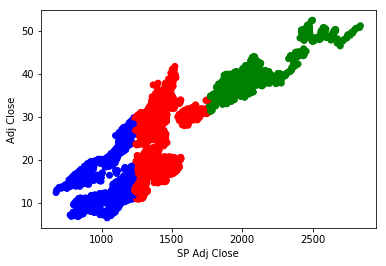

In [58]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = st[["Adj Close", "SP Adj Close"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels.max)
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(st["SP Adj Close"], st["Adj Close"], c=colors)
plt.xlabel("SP Adj Close")
plt.ylabel("Adj Close")
plt.show()

When SP Adj Close range from approximately 0-1200, the price of the Adj Close range from 0-30

When SP Adj Close range from approximately 1200-1700, the price of the Adj Close range from 10-40

When SP Adj Close range from approximately 1700-2500+, the price of the Adj Close range from 30-50+

Counter({0: 3449, 1: 790, 3: 154, -1: 70, 2: 40, 4: 39})


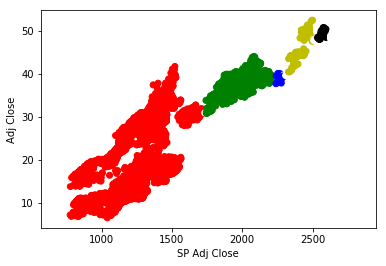

In [59]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=15, min_samples=15)
X = st[["Adj Close", "SP Adj Close"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_

# print labels
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(st["SP Adj Close"], st["Adj Close"], c=colors)
plt.xlabel("SP Adj Close")
plt.ylabel("Adj Close")
plt.show()

#### eps : float, optional

The maximum distance between two samples for them to be considered as in the same neighborhood.

#### min_samples : int, optional

The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

When SP Adj Close range from approximately 0-1700, the price of the Adj Close range from 0-40

When SP Adj Close range from approximately 1700-2200, the price of the Adj Close range from 30-40

When SP Adj Close range from approximately 1200+, the price of the Adj Close range from 40+

### 1）Do the clustering methods generate the same clusters?

No

### 2）Does scaling effect the clustering?

Yes,when eps is too large, most dots will come to one cluster

when eps is too small, the cluster will split


### 3）Does the clustering produce interesting groupings?  

No

## Generate a linear model for your data:
#### Find a significant linear relation of your choosing in your data. 
#### Create a multivariate linear model. 

In [60]:
st["styear"]=st["Date"].dt.year

In [61]:
plt.rcParams['figure.figsize'] = (12, 8)

#### try fitting a regression model more than 2 variable 

In [62]:
X = st[["SP Adj Close", "Open","High","Low","Close","styear"]]
y = st["Adj Close"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.691e+06
Date:                Mon, 12 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:14:30   Log-Likelihood:                -2785.7
No. Observations:                4542   AIC:                             5583.
Df Residuals:                    4536   BIC:                             5622.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
SP Adj Close     0.0021   3.14e-05     68.376      0.000       0.002       0.002
Open            -0.0006      0.028     -0.020      0.984      -0.055       0.053
High            -0.2786      0.029     -9.674      0.000      -0.335      -0.222
Low              0.2682      0.026     10.237      0.000       0.217       0.320
Close            0.9334      0.027     33.986      0.000       0.880       0.987
styear          -0.0013   1.34e-05    -99.478      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.331   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.847   Jarque-Bera (JB):                0.282
Skew:                           0.006   Prob(JB):                        0.869
Kurtosis:                       3.037   Cond. No.                     1.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.
 
 #### Identify the independent variable that has the largest absolute value for its standardized coefficient.
 #### the largest absolute value is "Close	"(0.9334)
 #### exclude insignificant ones: SP Adj Close, Open, styear

In [63]:
#after remove
X = st[["High","Low","Close"]]
y = st["Adj Close"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.664e+06
Date:                Mon, 12 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:14:30   Log-Likelihood:                -5452.0
No. Observations:                4542   AIC:                         1.091e+04
Df Residuals:                    4539   BIC:                         1.093e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
High          -0.8249      0.029    -28.475      0.000      -0.882      -0.768
Low            0.7752      0.028     27.413      0.000       0.720       0.831
Close          1.0093      0.040     25.162      0.000       0.931       1.088
==============================================================================
Omnibus:                     1400.088   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3833.275
Skew:                           1.647   Prob(JB):                         0.00
Kurtosis:                       6.067   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### In the multiple regression models are predictor variables independent of all the other predictor variables?   

In [64]:
st.corr()

,Open,High,Low,Close,Volume,Adj Close,ORCL Return,Gain,SP Adj Close,SP Return,styear
Open,1.000000,0.999428,0.999335,0.998971,-0.505426,0.997072,-0.007474,0.098643,0.855068,0.013304,0.749641
High,0.999428,1.000000,0.998830,0.999408,-0.495115,0.996865,0.008473,0.106165,0.851032,0.020062,0.740275
Low,0.999335,0.998830,1.000000,0.999353,-0.518623,0.998153,0.008260,0.114419,0.859730,0.021731,0.760792
Close,0.998971,0.999408,0.999353,1.000000,-0.506905,0.998089,0.026121,0.122768,0.855524,0.032697,0.751213
Volume,-0.505426,-0.495115,-0.518623,-0.506905,1.000000,-0.518161,-0.029669,-0.166845,-0.506970,-0.027943,-0.596151
Adj Close,0.997072,0.996865,0.998153,0.998089,-0.518161,1.000000,0.024270,0.125374,0.878033,0.031988,0.771808
ORCL Return,-0.007474,0.008473,0.008260,0.026121,-0.029669,0.024270,1.000000,0.658253,0.007463,0.593739,0.007389
Gain,0.098643,0.106165,0.114419,0.122768,-0.166845,0.125374,0.658253,1.000000,0.133625,0.467362,0.146290
SP Adj Close,0.855068,0.851032,0.859730,0.855524,-0.506970,0.878033,0.007463,0.133625,1.000000,0.029427,0.747507
SP Return,0.013304,0.020062,0.021731,0.032697,-0.027943,0.031988,0.593739,0.467362,0.029427,1.000000,0.023124


No, High, Low and Close also related to Open, Adj Close, SP Adj Close

### Is there any multi-colinearity in the model? 

           High       Low     Close
High   1.000000  0.998830  0.999408
Low    0.998830  1.000000  0.999353
Close  0.999408  0.999353  1.000000


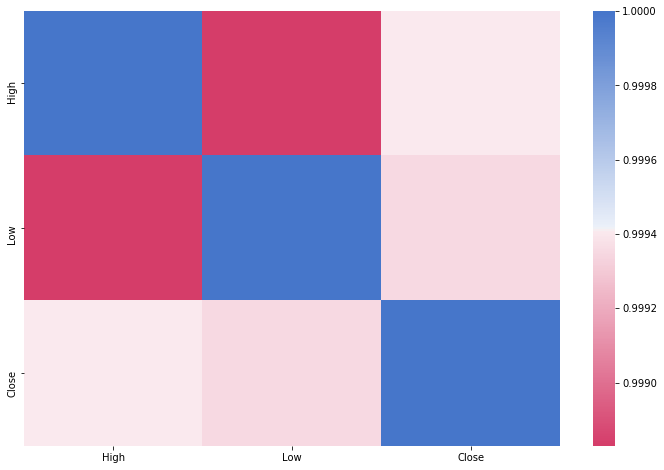

In [65]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = st[['High','Low', 'Close']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

Yes, There are multi-colinearity in the model

### Are any model assumptions violated?

#### Linear relationship
linear regression needs the relationship between the independent and dependent variables to be linear. So yes, they are linear

#### Multivariate normality
the linear regression analysis requires all variables to be multivariate normal.

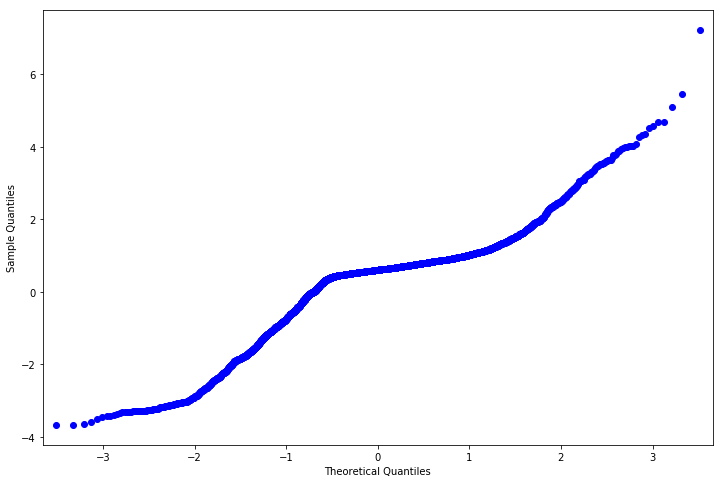

In [66]:
# Multivariate normality
st.exog = sm.add_constant( st['High'])
mod_fit = sm.OLS(st['High'],y).fit()
res = mod_fit.resid # residuals
fig = sm.qqplot(res)
plt.show()

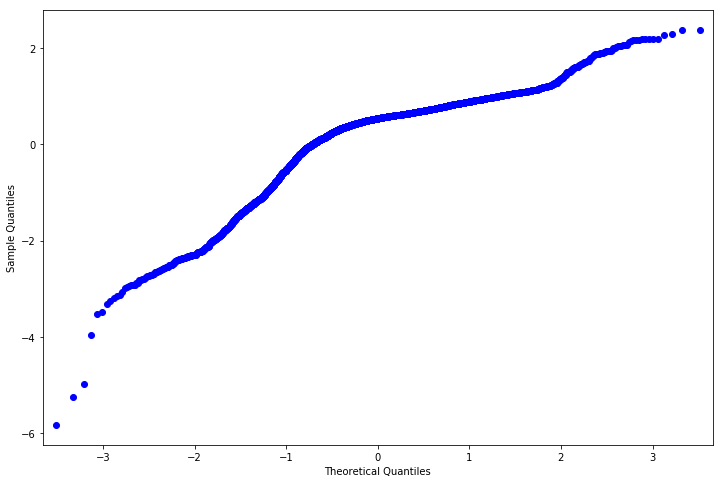

In [67]:
# Multivariate normality
st.exog = sm.add_constant( st['Low'])
mod_fit = sm.OLS(st['Low'],y).fit()
res = mod_fit.resid # residuals
fig = sm.qqplot(res)
plt.show()

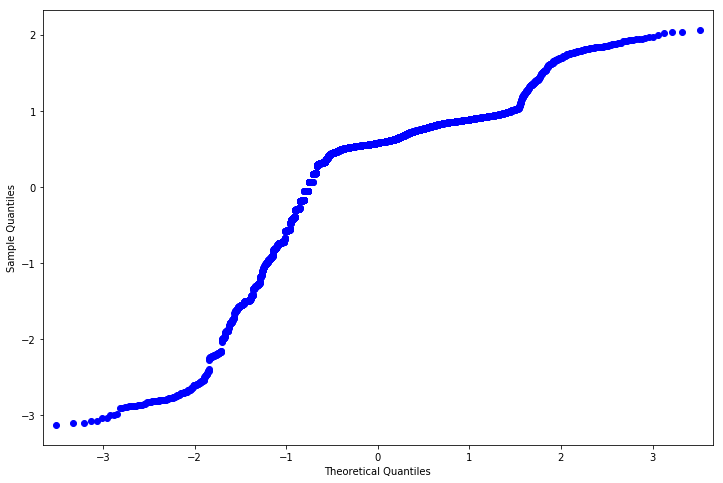

In [68]:
# Multivariate normality
st.exog = sm.add_constant( st['Close'])
mod_fit = sm.OLS(st['Close'],y).fit()
res = mod_fit.resid # residuals
fig = sm.qqplot(res)
plt.show()

Nearly Normal Distribution

#### No or little multicollinearity

In [69]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [70]:
vif.round(1)

,VIF Factor,features
0,4837.2,High
1,4402.1,Low
2,9063.5,Close


There are high multicolinearity.

In [71]:
#center the variables
x_centered = preprocessing.scale(X, with_mean='True', with_std='False')

#convert back into a Pandas dataframe and add column names
x_centered_df = pd.DataFrame(x_centered, columns=X.columns)

In [72]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_centered_df.values, i) for i in range(x_centered_df.shape[1])]
vif["features"] = x_centered_df.columns

In [73]:
vif.round(1)

,VIF Factor,features
0,847.8,High
1,775.6,Low
2,1533.5,Close


It reduces a lot

#### No auto-correlation

In [74]:
DW = np.sum( np.diff( model.resid.values )**2.0 ) / model.ssr
print('Durbin-Watson: {:.5f}'.format(DW))

Durbin-Watson: 0.18484


Values greater than two suggest negative correlation, 

and values less that one suggest positive correlation.

So there is no auto-correlation

#### Homoscedasticity

In [75]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 114180551641.53809), ('p-value', 0.0)]

The larger the F-statistic, the more evidence you’ll have against the homoskedasticity assumption 

and the more likely you have heteroskedasticity (different variance for the two groups).

### Cross-validate the model. How well did it do?

In [77]:
# Load the Diabetes Housing dataset
columns = "High Low Close".split() # Declare the columns names
df = pd.DataFrame(st, columns=columns) # load the dataset as a pandas data frame
y =  st["Adj Close"] # define the target variable (dependent variable) as y

In [78]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3179, 3) (3179,)
(1363, 3) (1363,)


In [79]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [80]:
#show first 5 predictions
predictions[0:5]

array([ 35.59710056,  47.95057457,  30.40725332,  22.60928086,  25.81443431])

Score: 0.997046713373


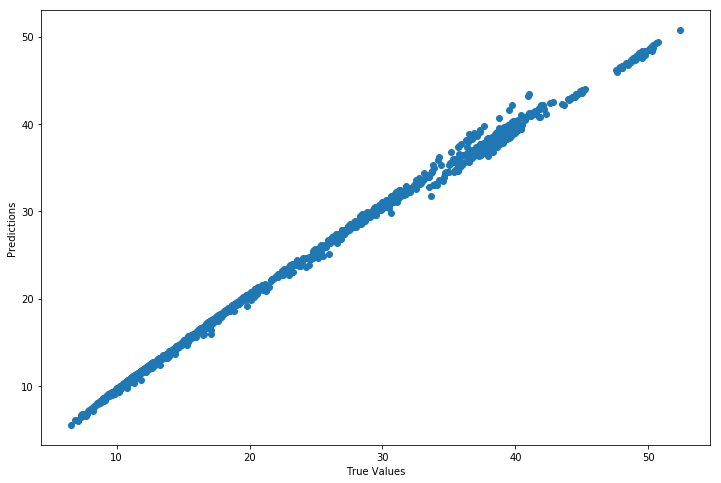

In [81]:
# The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print("Score:", model.score(X_test, y_test))

In [82]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.99084211  0.70149508  0.97686182  0.97839219  0.98508995  0.817286  ]


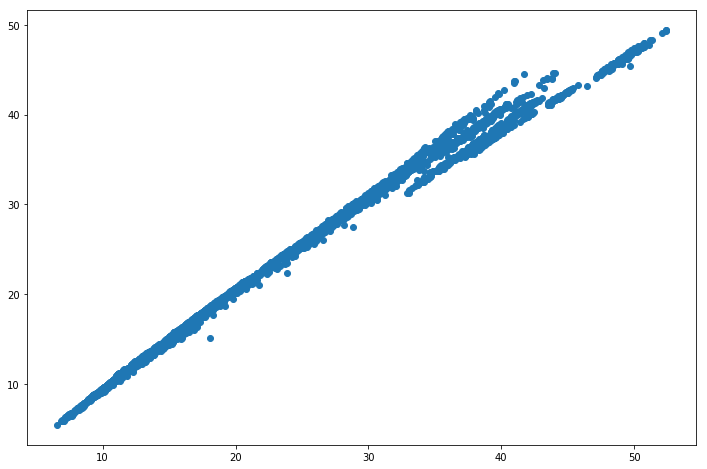

In [83]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

In [84]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.992402218245


### Does regularization help with creating models that validate better on out of sample data?

In [85]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5,1,'Ridge Regression - Prices vs Predicted prices: $Y_i$ vs $\\hat{y}_i$')

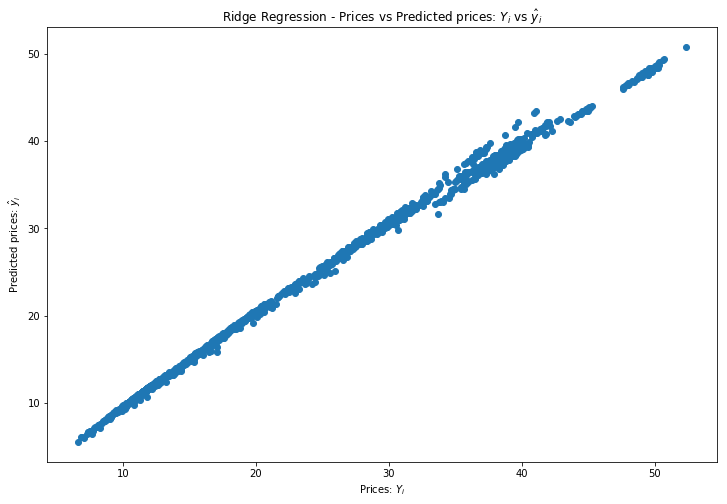

In [86]:
y_pred = ridge.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Ridge Regression - Prices vs Predicted prices: $Y_i$ vs $\hat{y}_i$")

In [87]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.62297470581533487

In [88]:
# RMSE using 5-fold cross-validation

kf = KFold(len(X), n_folds=2)
scores = []
for train, test in kf:
    lm.fit(X_train,y_train)
    scores.append(np.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test))))
scores

[0.62295428654856455, 0.62295428654856455]

In [89]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)

In [90]:
show_stats('Ridge Regression',rmse ,np.mean(scores))

Method: Ridge Regression
RMSE on no CV training: 0.623
RMSE on 5-fold CV: 0.623


In [91]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])


for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    ridge.fit(X,y)
    y_pred = ridge.predict(X)
    err = y_pred-y    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
    kf = KFold(len(X), n_folds=5)
    xval_err = 0
    for train, test in kf:
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        err = y_pred - y_test
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 0.6362		 0.7631
0.418	 0.6362		 0.7631
0.826	 0.6362		 0.7631
1.234	 0.6362		 0.7631
1.642	 0.6362		 0.7632
2.050	 0.6362		 0.7632
2.458	 0.6362		 0.7632
2.866	 0.6362		 0.7632
3.274	 0.6362		 0.7632
3.682	 0.6362		 0.7633
4.090	 0.6362		 0.7633
4.498	 0.6362		 0.7633
4.906	 0.6363		 0.7633
5.313	 0.6363		 0.7634
5.721	 0.6363		 0.7634
6.129	 0.6363		 0.7634
6.537	 0.6363		 0.7634
6.945	 0.6363		 0.7635
7.353	 0.6363		 0.7635
7.761	 0.6363		 0.7635
8.169	 0.6363		 0.7636
8.577	 0.6363		 0.7636
8.985	 0.6363		 0.7636
9.393	 0.6363		 0.7636
9.801	 0.6363		 0.7637
10.209	 0.6363		 0.7637
10.617	 0.6363		 0.7637
11.025	 0.6363		 0.7638
11.433	 0.6363		 0.7638
11.841	 0.6363		 0.7638
12.249	 0.6363		 0.7639
12.657	 0.6363		 0.7639
13.065	 0.6363		 0.7639
13.473	 0.6363		 0.7640
13.881	 0.6363		 0.7640
14.289	 0.6363		 0.7640
14.697	 0.6364		 0.7640
15.104	 0.6364		 0.7641
15.512	 0.6364		 0.7641
15.920	 0.6364		 0.7642
16.328	 0.6364		 0.7

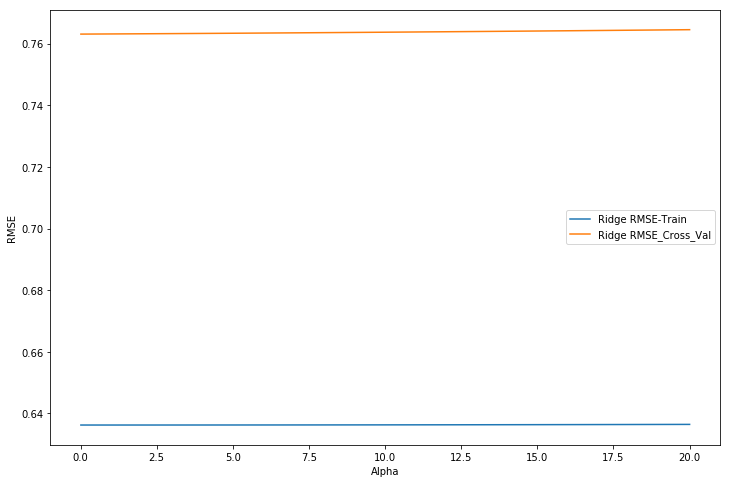

In [92]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
pl.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

### Generate a logistic model for your data:
#### Find a significant logistic linear model of your choosing in your data. Create a logistic linear model.

In [93]:
stock_log_model = sm.Logit(st['Gain'], st['Volume']).fit()
stock_log_model.summary()

Optimization terminated successfully.
         Current function value: 0.678093
         Iterations 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Gain   No. Observations:                 4542
Model:                          Logit   Df Residuals:                     4541
Method:                           MLE   Df Model:                            0
Date:                Mon, 12 Feb 2018   Pseudo R-squ.:                -0.04771
Time:                        14:14:32   Log-Likelihood:                -3079.9
converged:                       True   LL-Null:                       -2939.6
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      8.766e-09   7.94e-10     11.039      0.000    7.21e-09    1.03e-08
==============================================================================
"""

In [94]:
stock_log_model.conf_int()

,0,1
Volume,7.209443e-09,1.032222e-08


In [95]:
#odds ratio
#Take the exponential of each of the coefficients to generate the odds ratios. 
np.exp(stock_log_model.params)

Volume    1.0
dtype: float64

In [96]:
# odds ratios and 95% CI
params = stock_log_model.params
conf = stock_log_model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
Volume,1.0,1.0,1.0


In [97]:
X = st[["Volume"]]
y = st[["Gain"]]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [99]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.657


### Assumption
#### 1)binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal

#### 2)logistic regression requires the observations to be independent of each other. 

Yes

#### 3)logistic regression requires there to be little or no multicollinearity among the independent variables.  

There is one variable so not related

#### 4)logistic regression assumes linearity of independent variables and log odds.  

In [103]:
Gain=st['Gain']
uniqueFirstCol=set(Gain)
print(uniqueFirstCol)

{0.0, 1.0}


So there is no log odd

#### 5)logistic regression typically requires a large sample size. 

Yes